In [2]:
!python3 -m pip install librosa --user

     |████████████████████████████████| 1.6 MB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 323 kB 75.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.7 MB 92.3 MB/s eta 0:00:01
     |████████████████████████████████| 20.2 MB 25.4 MB/s eta 0:00:01
     |████████████████████████████████| 399 kB 81.3 MB/s eta 0:00:01
     |████████████████████████████████| 112 kB 95.4 MB/s eta 0:00:01
  Created wheel for librosa: filename=librosa-0.7.2-py3-none-any.whl size=1613952 sha256=ace08697a841a386e9789800dbbe79a22ba35e26d58bc1094e5bbb749c0750d4
  Stored in directory: /home/animeshs/.cache/pip/wheels/4b/72/78/82101d52cdfc32755f1606294a72d380aabb3fe70e105a71a0
  Created wheel for audioread: filename=audioread-2.1.8-py3-none-any.whl size=26090 sha256=9180911a8e36b0478f8c18a0d079cd2defab3cd18e2ba6044c992cff172aac25
  Stored in directory: /home/animeshs/.cache/pip/wheels/fb/86/30/67eca0131420c96216f3a8a63a69795f6f5ebedad799ab0b00
  Created wheel for resampy: filename=resamp

In [5]:
import librosa
from scipy.fftpack import fft
import numpy as np
n_fft = 1024
hop_length = 256
n_mels = 40
f_min = 20
f_max = 8000
fmin = 20
fmax = 8000
n_fft = 1024
sample_rate = 16000
sample_rate = 16000
clip, sample_rate = librosa.load('../HareKrishna.mp3', sr=None)
#signal, sample_rate = librosa.load(file, sr=22050)
clip = clip[:132300] # first three seconds of file
n_fft = 1024  # frame length 
start = 45000 # start at a part of the sound thats not silence
x = clip[start:start+n_fft]
X = fft(x, n_fft)
X_magnitude, X_phase = librosa.magphase(X)
X_magnitude_db = librosa.amplitude_to_db(X_magnitude)
stft = librosa.stft(clip, n_fft=n_fft, hop_length=hop_length)
stft_magnitude, stft_phase = librosa.magphase(stft)
stft_magnitude_db = librosa.amplitude_to_db(stft_magnitude)
mel_spec = librosa.feature.melspectrogram(clip, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, sr=sample_rate, power=1.0, fmin=fmin, fmax=fmax)
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)

/home/animeshs/.local/lib/python3.5/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/home/animeshs/.local/lib/python3.5/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


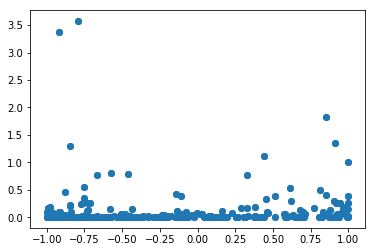

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X_phase, X_magnitude)

In [8]:
# WAVEFORM
# display waveform
plt.figure()#(figsize=FIG_SIZE)
librosa.display.waveplot(signal, sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")
# FFT -> power spectrum
fft = np.fft.fft(signal)
# calculate abs values on complex numbers to get magnitude
spectrum = np.abs(fft)
# create frequency variable
f = np.linspace(0, sample_rate, len(spectrum))
# take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]
# plot spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples
# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate
print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))
# perform stft
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)
# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")
# apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")
# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")
# show plots
plt.show()

AttributeError: module 'librosa' has no attribute 'display'